In [30]:
import csv
import matplotlib.pyplot as plt 

In [2]:
import json

In [3]:
ls

ids.csv                test/      train.json      validation.json
missing-images.txt     test.json  Untitled.ipynb
sample_submission.csv  train/     validation/


In [4]:
with open('./train.json') as fp:
    obj = json.load(fp)
annos = obj['annotations']
img2lbl = {}
for anno in annos:
    img_id = int(anno['imageId'])
    lbl_ids = [int(str_id) for str_id in anno['labelId']]
    img2lbl[img_id] = lbl_ids

In [10]:
task2lbl = {i: set() for i in [1,2,3,4,5,6,8,9]}
task2name = {i: None for i in [1,2,3,4,5,6,8,9]}
lbl2name = {i: None for i in [1,2,3,4,5,6,8,9]}
with open('./ids.csv') as fp:
    file = csv.reader(fp)
    next(file)
    for row in file:
        lbl_id = int(row[0])
        task_id = int(row[1])
        task2lbl[task_id].add(lbl_id)
        lbl2name[lbl_id] = row[2]
        task2name[task_id] = row[3]

In [73]:
lbl2nums = {lbl_id: 0 for lbl_id in lbl2name.keys()}
for img_id, lbl_ids in img2lbl.items():
    for lbl_id in lbl_ids:
        lbl2nums[lbl_id] += 1

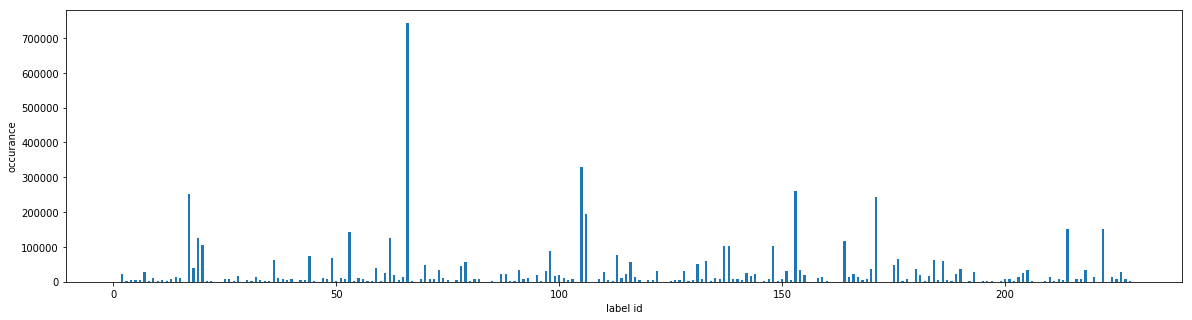

In [75]:
fig = plt.figure(figsize=(20, 5))
plt.bar(lbl2nums.keys(), lbl2nums.values(), .5)
plt.xlabel("label id")
plt.ylabel("occurance")
plt.show()

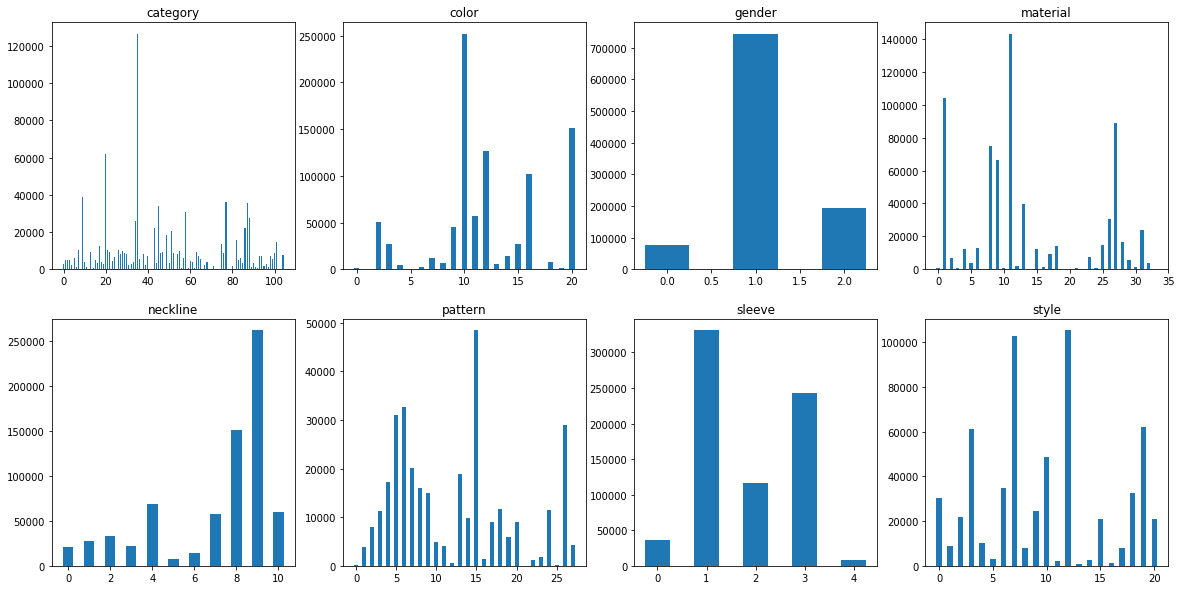

In [83]:
num_list = []
plt.figure(figsize=(20,10))
for i in range(8):
    task_id = [1, 2, 3, 4, 5, 6, 8, 9][i]
    plt.subplot(241 + i)
    lbls = task2lbl[task_id]
    cur_lbl2nums = [lbl2nums[lbl_id] for lbl_id in lbls]
    plt.bar(range(len(cur_lbl2nums)), cur_lbl2nums, .5)
    plt.title(task2name[task_id])
plt.show()

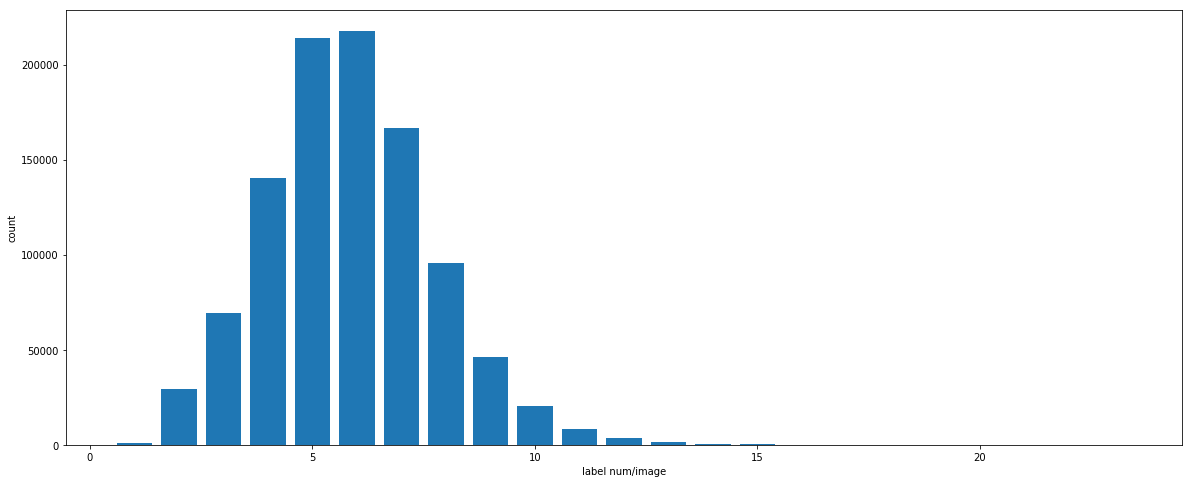

In [87]:
lbl_num_counts = {}

for img_id, lbl_ids in img2lbl.items():
    lbl_num = len(lbl_ids)
    if lbl_num in lbl_num_counts:
        lbl_num_counts[lbl_num] += 1
    else:
        lbl_num_counts[lbl_num] = 1
        
fig = plt.figure(figsize=(20, 8))
plt.bar(lbl_num_counts.keys(), lbl_num_counts.values(), 0.8)
plt.xlabel("label num/image")
plt.ylabel("count")
plt.show()


In [56]:
num_list = []
for task_id in [1, 2, 3, 4, 5, 6, 8, 9]:
    lbls = task2lbl[task_id]
    nums = [0, 0, 0]
    for img_id, lbl_ids in img2lbl.items():
        ids = list(filter(lambda lbl_id: lbl_id in lbls, lbl_ids))
        num = len(ids)
        if num >= 2:
            nums[2] += 1
        else:
            nums[num] += 1
    num_list.append(nums)

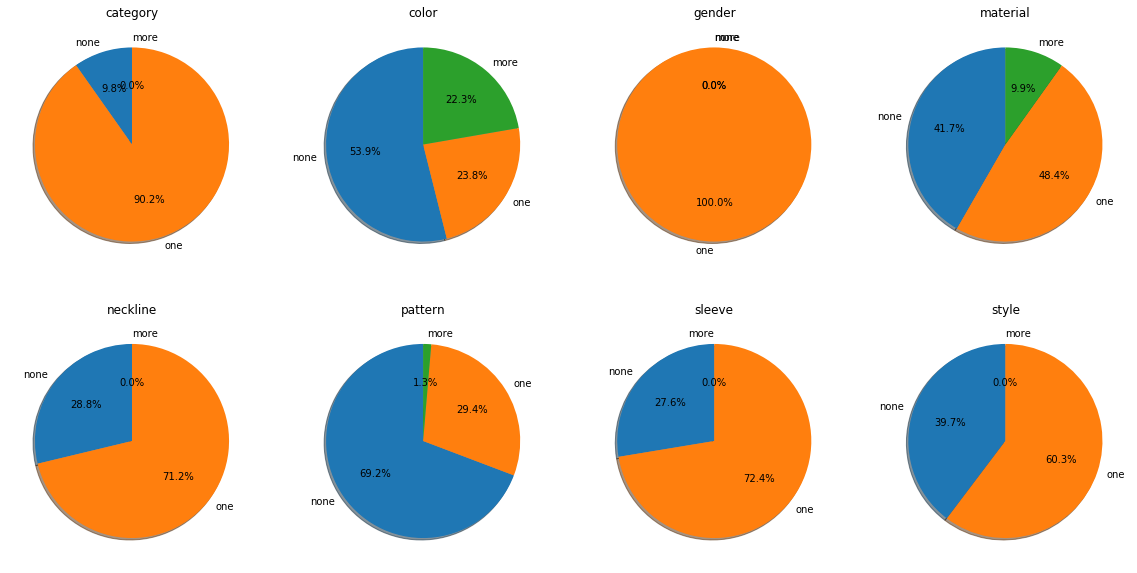

In [65]:
from matplotlib import font_manager as fm
proptease = fm.FontProperties()
proptease.set_size('medium')


plt.figure(figsize=(20,10))
for i in range(8):
    task_id = [1, 2, 3, 4, 5, 6, 8, 9][i]
    plt.subplot(241 + i)
    patches, texts, autotexts = plt.pie(num_list[i], labels=['none', 'one', 'more'], autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)
    plt.title(task2name[task_id])
plt.show()

In [22]:
cate2sleeve_nums = {lbl_id: 0 for lbl_id in task2lbl[1]}
for img_id, lbl_ids in img2lbl.items():
    sleeve_ids = list(filter(lambda lbl_id: lbl_id in task2lbl[8], lbl_ids))
    cates_ids = list(filter(lambda lbl_id: lbl_id in task2lbl[1], lbl_ids))
    if len(sleeve_ids) > 0 and len(cates_ids) == 1:
        cate2sleeve_nums[cates_ids[0]] += 1

for lbl_id, num in cate2sleeve_nums.items():
    if num == 0:
        print(lbl_id, lbl2name[lbl_id], num)

22 Boots 0
27 Business Shoes 0
34 Cargo Shorts 0
39 Casual Shoes 0
40 Casual Shorts 0
46 Cleats 0
68 Flats 0
83 Heels 0
86 Hiking Boots 0
104 Loafers & Slip-on Shoes 0
145 Rain Boots 0
156 Running Shoes 0
157 Sandals 0
161 Shoe Accessories 0
162 Shoe Inserts 0
163 Shoelaces 0
172 Slippers 0
174 Sneakers 0
179 Stilettos 0
221 Wedges & Platforms 0
223 Winter Boots 0


In [23]:
cate2neck_nums = {lbl_id: 0 for lbl_id in task2lbl[1]}
for img_id, lbl_ids in img2lbl.items():
    neck_ids = list(filter(lambda lbl_id: lbl_id in task2lbl[5], lbl_ids))
    cates_ids = list(filter(lambda lbl_id: lbl_id in task2lbl[1], lbl_ids))
    if len(neck_ids) > 0 and len(cates_ids) == 1:
        cate2neck_nums[cates_ids[0]] += 1

for lbl_id, num in cate2neck_nums.items():
    if num == 0:
        print(lbl_id, lbl2name[lbl_id], num)

22 Boots 0
27 Business Shoes 0
34 Cargo Shorts 0
39 Casual Shoes 0
40 Casual Shorts 0
46 Cleats 0
68 Flats 0
83 Heels 0
86 Hiking Boots 0
104 Loafers & Slip-on Shoes 0
145 Rain Boots 0
156 Running Shoes 0
157 Sandals 0
161 Shoe Accessories 0
162 Shoe Inserts 0
163 Shoelaces 0
172 Slippers 0
174 Sneakers 0
179 Stilettos 0
221 Wedges & Platforms 0
223 Winter Boots 0
